## 1.0 Defining the Question

A resort and Lisbon City Hotel are 2 hotels located in Portugal. The two hotels wish to get the best model to predict whether their reservations will be canceled or not so that they can adequately plan themselves in terms of supplies and staffing. This will ensure that they are able to cater to their guests more efficiently.bold text





**Dataset provided**

hotel booking dataset  [link](https://www.kaggle.com/jessemostipak/hotel-booking-demand)

Data grossary

* **Hotel:** (H1 = Resort Hotel or H2 = City Hotel)
* is_canceled: Value indicating if the booking was canceled (1) or not (0)
* **lead_time:** Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
* **arrival_date_year:** Year of arrival date
* **arrival_date_month**: Month of arrival date
* **arrival_date_week_number:** Week number of year for arrival date
* **arrival_date_day_of_month:** Day of arrival date
* **stays_in_weekend_nights**:Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* **stays_in_week_night:** Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* **adults:** Number of adults
* **deposit_type;** whether the customer paid deposit or not.
* **agent:** agent id
* **company:** company reversation or not 
* **days_in_waiting_list:** time it takes for the client booking to be accepted.
* **customer_type:** type of the customer
* **adr:** client address
* **required_car_parking_spaces**: car parking space
* **total_of_special_requests:** number of special guests
* **reservation_status:** reservation status(checked in, checked out)
* **reservation_status_date:** date of reservation.







###1.1 Specifying the data analytic question

To predict if the client who made the hotel reservation will cancel or not cancel.




### 1.2 Defining the metric for success

identify the best model with over 80% accuracy to be used to predict on whether the hotel reservation will be canceled or not cancelled.

### 1.3 Understanding the Context

Algarve resort and Lisbon City Hotel are 2 hotels located in Portugal. The two hotels receive the clients during the whole year. reservation flactuates during the year where some months register high bookings than others.
Reservation cancelation is common and there is a need to minimize on this issue.

### 1.4 Recording the Experimental Design

* upload and read our csv files
* clean our dataset
* perfom EDA
* build our models using
   * Logistic Reg
   * Random Forest
   * Gradient Boosted Trees
   * Naive Bayes Classifier
   * Neural Network
   * k-NN classifier
   * SVM
* challenge our solution
* Evaluate their performance on the dataset at hand and then provide observations and recommendations on the suitability of each of the tested models on their appropriateness of solving the given problem.

### 1.5 Assessing the Relevance of the 

the dataset is relevant since it has all the features related to hotel activities

## 2.Loading and reading Our Datasets

In [ ]:
# Importing important libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading the datasets
names = ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date']
hotel_df = pd.read_csv('hotel_bookings.csv', usecols=names)
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### 3. Checking the Data

In [ ]:
# Determing the number of records in our dataset
hotel_df.shape

(119390, 32)

In [ ]:
# Previewing the first records of our dataset
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Previewing the last records of our dataset
hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
#consice summary of train dataset
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**observation**: our datset has 119390 observations and 32 variables, it has 4 floats, 16int and 12 object datatype.

In [ ]:
# checking the target variable
hotel_df.is_canceled.value_counts() 

0    75166
1    44224
Name: is_canceled, dtype: int64

In [ ]:
#getting the above in parcentage
#
hotel_df.is_canceled.value_counts() / len(hotel_df) * 100 

0    62.958372
1    37.041628
Name: is_canceled, dtype: float64

## 4. External Data Source Validation

### a. Validation

* the data is valid since it can be confirmed on Kaggle which is the trusted open data source, and also based on other international publications.

## 5. Tidying the Dataset




In [ ]:
#creating a copy of the dataset to be be used on cleaning process
hotel_df1=hotel_df.copy()
#
#getting the irrelevant varaibles
columns = ['arrival_date_year','agent','arrival_date_week_number','lead_time', 'market_segment', 'distribution_channel','booking_changes','days_in_waiting_list', 'adr','reservation_status_date']
#
#dropping the irrelevant colunms
drop_colunms= hotel_df1.drop(columns, axis = 1, inplace=True)
#
#previewing the dataset
hotel_df1.head()

,hotel,is_canceled,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,company,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,July,1,0,0,2,0.0,0,BB,PRT,0,0,0,C,C,No Deposit,NaN,Transient,0,0,Check-Out
1,Resort Hotel,0,July,1,0,0,2,0.0,0,BB,PRT,0,0,0,C,C,No Deposit,NaN,Transient,0,0,Check-Out
2,Resort Hotel,0,July,1,0,1,1,0.0,0,BB,GBR,0,0,0,A,C,No Deposit,NaN,Transient,0,0,Check-Out
3,Resort Hotel,0,July,1,0,1,1,0.0,0,BB,GBR,0,0,0,A,A,No Deposit,NaN,Transient,0,0,Check-Out
4,Resort Hotel,0,July,1,0,2,2,0.0,0,BB,GBR,0,0,0,A,A,No Deposit,NaN,Transient,0,1,Check-Out


In [ ]:
# Check for missing values
#
hotel_df1.isnull().sum()

hotel                                  0
is_canceled                            0
arrival_date_month                     0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
deposit_type                           0
company                           112593
customer_type                          0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
dtype: int64

In [ ]:
#getting the percentage of missing data in each column
#
hotel_df1.isnull().sum()/len(hotel_df1)* 100 



hotel                              0.000000
is_canceled                        0.000000
arrival_date_month                 0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
deposit_type                       0.000000
company                           94.306893
customer_type                      0.000000
required_car_parking_spaces        0.000000
total_of_special_requests          0.000000
reservation_status                 0.000000
dtype: float64

In [ ]:
# as a role of thumb, drop any colunm with more than 25% of the missing data.
#
hotel_df1 = hotel_df1[hotel_df1.columns[hotel_df1.isnull().mean() < 0.25]]
hotel_df1.shape

(119390, 21)

In [ ]:
hotel_df1.isnull().sum()

hotel                               0
is_canceled                         0
arrival_date_month                  0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
deposit_type                        0
customer_type                       0
required_car_parking_spaces         0
total_of_special_requests           0
reservation_status                  0
dtype: int64

**observation**: the data type are appropriate now and there is a clue that we have null values.

In [ ]:
#filling the missing values of children variable with the mean
#
hotel_df1['children']= hotel_df1['children'].fillna(hotel_df1['children'].mean(), axis = 0)

In [ ]:
#filling the missing values in the country variable with mode
#
hotel_df1.fillna({'country': hotel_df1['country'].mode()[0]}, inplace=True)

In [ ]:
hotel_df1.columns

Index(['hotel', 'is_canceled', 'arrival_date_month',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'customer_type',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

In [ ]:
#confriming no missing values.
#
hotel_df1.isnull().sum().any()

False

In [ ]:
# Checking if there are duplicates
#
hotel_df1.duplicated().sum()

38125

In [ ]:
# Dropping duplicates
hotel_df1.drop_duplicates(inplace=True)
#
#confirm no duplicates
#
hotel_df1.duplicated().any()

False

In [ ]:
#To remove white spaces in our columns
hotel_df1.columns.str.replace(" "," ")

Index(['hotel', 'is_canceled', 'arrival_date_month',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'customer_type',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

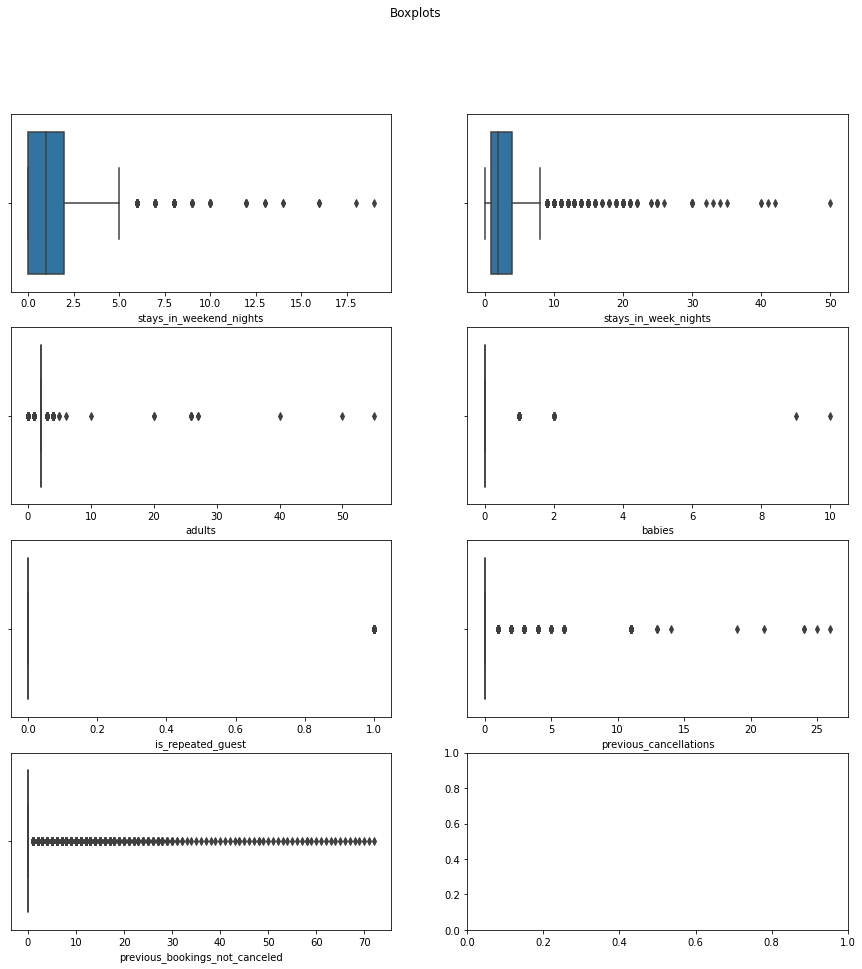

In [ ]:
# To check for outliers through boxplots
#

fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6), (ax7, ax8)) = plt.subplots(4,2, figsize=(15, 15))

fig.suptitle('Boxplots')
sns.boxplot(hotel_df1['stays_in_weekend_nights'], ax=ax1)
sns.boxplot(hotel_df1['stays_in_week_nights'], ax=ax2)
sns.boxplot(hotel_df1['adults'], ax=ax3)
sns.boxplot(hotel_df1['babies'], ax=ax4)
sns.boxplot(hotel_df1['is_repeated_guest'], ax=ax5)
sns.boxplot(hotel_df1['previous_cancellations'], ax=ax6)
sns.boxplot(hotel_df1['previous_bookings_not_canceled'], ax=ax7)
plt.show()

In [ ]:
# Check for outliers through IQR Score

# we first get the interquantile range for each column
Q1 = hotel_df1.quantile(0.25)
Q3 = hotel_df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

is_canceled                        1.0
arrival_date_day_of_month         15.0
stays_in_weekend_nights            2.0
stays_in_week_nights               3.0
adults                             0.0
children                           0.0
babies                             0.0
is_repeated_guest                  0.0
previous_cancellations             0.0
previous_bookings_not_canceled     0.0
required_car_parking_spaces        0.0
total_of_special_requests          1.0
dtype: float64


In [ ]:
# We then get the outliers as follows:
# True means presence of outliers

(hotel_df1 < (Q1 - 1.5 * IQR)) |(hotel_df1 > (Q3 + 1.5 * IQR))

,adults,arrival_date_day_of_month,arrival_date_month,assigned_room_type,babies,children,country,customer_type,deposit_type,hotel,is_canceled,is_repeated_guest,meal,previous_bookings_not_canceled,previous_cancellations,required_car_parking_spaces,reservation_status,reserved_room_type,stays_in_week_nights,stays_in_weekend_nights,total_of_special_requests
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
119386,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
119388,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# We then filter out outliers and remain with valid values as follows

df_clean = hotel_df1[~((hotel_df1 < (Q1 - 1.5 * IQR)) |(hotel_df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clean.shape

(43962, 21)

**observation**: clean dataset has 43962 records and 21 variables.

In [ ]:
#converting the data to the correct datatype- float
#
df_clean[["is_canceled", "arrival_date_day_of_month", "stays_in_weekend_nights", "adults", "adults", "previous_cancellations","previous_cancellations", "previous_bookings_not_canceled","required_car_parking_spaces", "total_of_special_requests" ]] = df_clean[["is_canceled", "arrival_date_day_of_month", "stays_in_weekend_nights", "adults", "adults", "previous_cancellations","previous_cancellations", "previous_bookings_not_canceled","required_car_parking_spaces", "total_of_special_requests"]].astype(float)
#

#converting categorical variables to the correct datatype-category
#
df_clean[["hotel","arrival_date_month","meal", "country", "reserved_room_type","assigned_room_type", "deposit_type", "customer_type", "reservation_status" ]] = df_clean[["hotel","arrival_date_month","meal", "country", "reserved_room_type","assigned_room_type", "deposit_type", "customer_type", "reservation_status"]].astype('category')

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43962 entries, 0 to 119389
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   hotel                           43962 non-null  category
 1   is_canceled                     43962 non-null  float64 
 2   arrival_date_month              43962 non-null  category
 3   arrival_date_day_of_month       43962 non-null  float64 
 4   stays_in_weekend_nights         43962 non-null  float64 
 5   stays_in_week_nights            43962 non-null  int64   
 6   adults                          43962 non-null  float64 
 7   children                        43962 non-null  float64 
 8   babies                          43962 non-null  int64   
 9   meal                            43962 non-null  category
 10  country                         43962 non-null  category
 11  is_repeated_guest               43962 non-null  int64   
 12  previous_cancella

## 6. Exploratory Data Analysis

## 6a. Univariate analysis

We will now perform univariate analysis. This is a type of analysis done only one variable. This type of analysis will be helpful in understanding the characteristics of each variables.






In [ ]:
# preview of our dataset
#
df_clean.head()

,hotel,is_canceled,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0.0,July,1.0,0.0,0,2.0,0.0,0,BB,PRT,0,0.0,0.0,C,C,No Deposit,Transient,0.0,0.0,Check-Out
4,Resort Hotel,0.0,July,1.0,0.0,2,2.0,0.0,0,BB,GBR,0,0.0,0.0,A,A,No Deposit,Transient,0.0,1.0,Check-Out
6,Resort Hotel,0.0,July,1.0,0.0,2,2.0,0.0,0,BB,PRT,0,0.0,0.0,C,C,No Deposit,Transient,0.0,0.0,Check-Out
7,Resort Hotel,0.0,July,1.0,0.0,2,2.0,0.0,0,FB,PRT,0,0.0,0.0,C,C,No Deposit,Transient,0.0,1.0,Check-Out
8,Resort Hotel,1.0,July,1.0,0.0,3,2.0,0.0,0,BB,PRT,0,0.0,0.0,A,A,No Deposit,Transient,0.0,1.0,Canceled


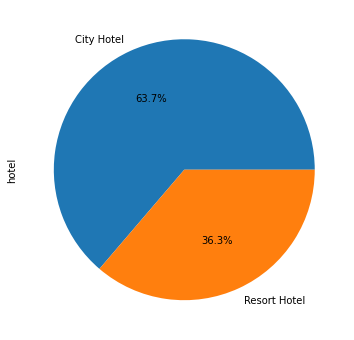

In [ ]:
#univariate analysis: hotel variable piechart
#
plt.figure(figsize = (6, 6))
df_clean.hotel.value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
plt.show()

**observation**: city hotel registered a higher reservation of 63.7%

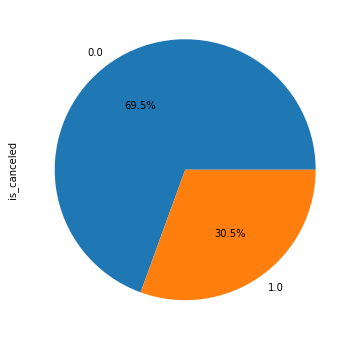

In [ ]:
#univariate analysis: is cancelled variable piechart
#
plt.figure(figsize = (6, 6))
df_clean.is_canceled.value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
plt.show()

#0=> not cancelled
#1=> cancelled

**observation**: only 31% of reversation was cancelled.

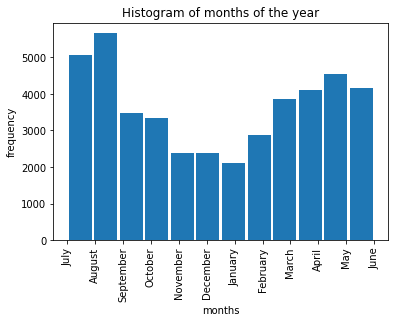

In [ ]:
# univariate analysis: month of arrival variable histogram
#
plt.hist(df_clean['arrival_date_month'], bins=12, histtype='bar', rwidth=0.9)
plt.xticks(rotation=90)
plt.xlabel('months')
plt.ylabel('frequency')
plt.title('Histogram of months of the year') 
plt.show()

**observation**: The most popular months of travel were between May and August with the peak being recorded at August.

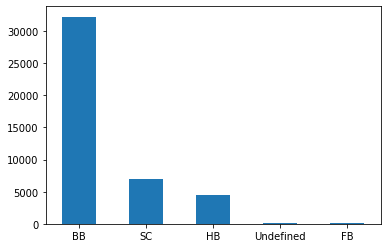

In [ ]:
# univariate analysis: meal variable bar graph
df_clean.meal.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

**observation**: many guests went for bed and breakfast option.

In [ ]:
# univariate analysis: month of arrival frequency count
# 
df_clean.country.value_counts(ascending=False) 

PRT    11009
GBR     6035
FRA     5082
ESP     3490
DEU     3203
       ...  
CYM        1
NPL        1
JAM        1
PYF        1
ABW        1
Name: country, Length: 163, dtype: int64

**observation**: Most of the hotel guests came from Portugal and Great Britain.

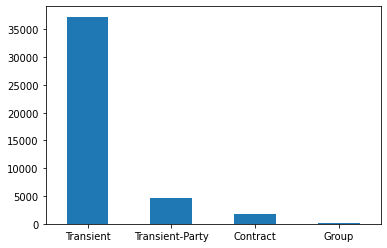

In [ ]:
# univariate analysis: customer type variable bar graph
df_clean.customer_type.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

**observation**:The most frequent type of guest was the transient.

**observation**: Most popular arrival dates for customers is 17th and  2nd early of the month mostly because that's when people get their salaries

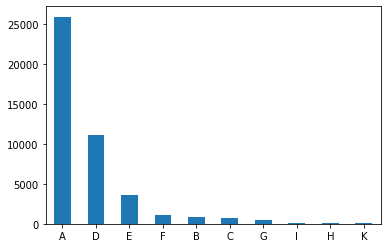

In [ ]:
# univariate analysis: room type variable bar graph
df_clean.assigned_room_type.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

**observation**: most of the clients went for romm type A

## Observations from Univariate Analysis
1. Guests preferred the city hotels to the resort hotels
2. Most guests went for the Bed and Break fast option while the Full board option had the least customers
3.Most of the hotel guests came from Portugal and Great Britain while very few came from Germany
4.The most frequent type of guest was the transient type who came for a short term visit while the group type of guests were the least
5.The most popular months of travel were between May and August with the peak being recorded at July mainly because it is summer in Europe during these months
6.Most popular arrival dates for customers is during end month mostly because that's when people get their salaries 
7.The most popular room type both for bookings and reservations is Type A while the least popular L

### Bivariate analysis

### Bar Charts to show the relationship between booking cancellation status and other variables

In [ ]:
df_clean['is_canceled'].value_counts()

# 0 = not canceled
# 1 = canceled

0.0    30532
1.0    13430
Name: is_canceled, dtype: int64

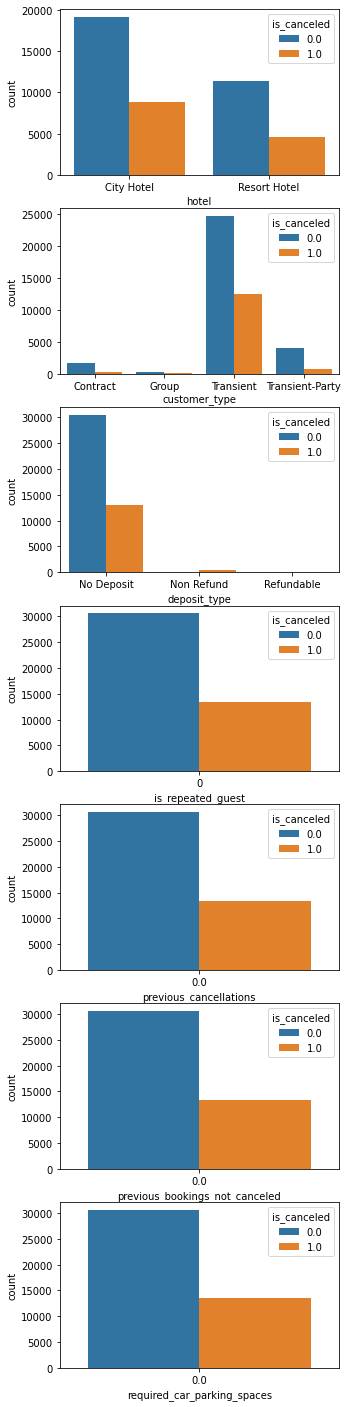

In [ ]:
#plotting the target variable against other features.
# ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

f, axes = plt.subplots(7, 1, figsize=[5, 25])

sns.countplot('hotel', hue= 'is_canceled', data=df_clean, ax=axes[0])
sns.countplot('customer_type', hue= 'is_canceled', data=df_clean, ax=axes[1])
sns.countplot('deposit_type', hue= 'is_canceled', data=df_clean, ax=axes[2])
sns.countplot('is_repeated_guest', hue= 'is_canceled', data=df_clean, ax=axes[3])
sns.countplot('previous_cancellations', hue= 'is_canceled', data=df_clean, ax=axes[4])
sns.countplot('previous_bookings_not_canceled', hue= 'is_canceled', data=df_clean, ax=axes[5])
sns.countplot('required_car_parking_spaces', hue= 'is_canceled', data=df_clean, ax=axes[6])

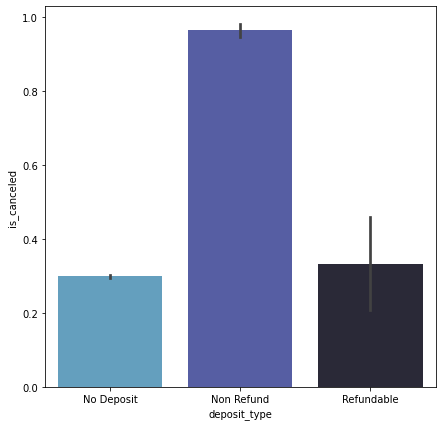

In [ ]:
#Distribution of cancellation and Deposit Type¶

plt.figure(figsize=(7,7))
sns.barplot(x=df_clean['deposit_type'], y=df_clean['is_canceled'], palette=sns.color_palette("icefire"))

#It Seems more bookings were non refundable and were cancelled more as well

[Text(0, 0.5, ''),
 Text(0.5, 0, 'Reservation_status'),
 Text(0.5, 1.0, 'Guest without special requests')]

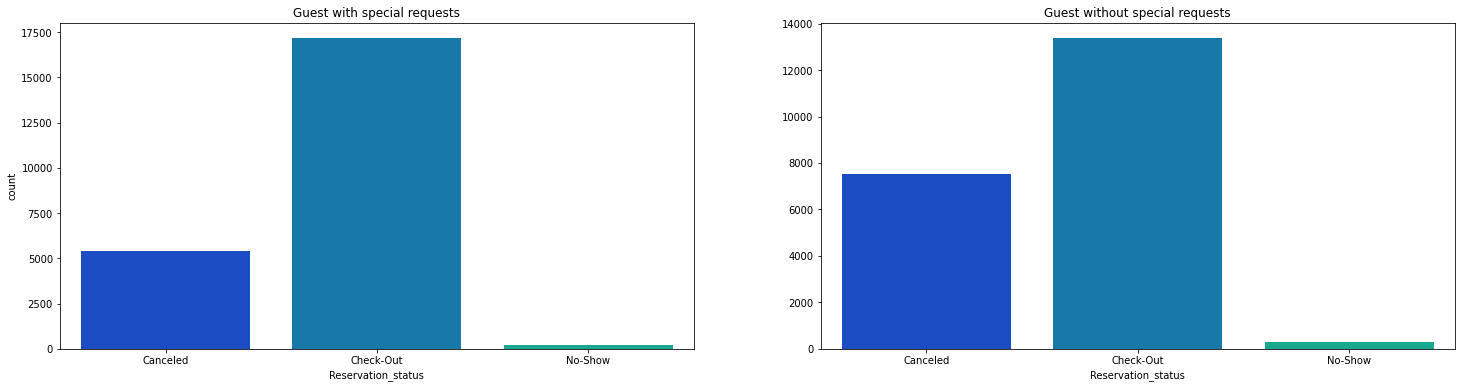

In [ ]:
# Special and non Special Request of the guest
fig, ax = plt.subplots(1, 2, figsize=[25, 6])

special = df_clean[df_clean.total_of_special_requests != 0]
non_special = df_clean[df_clean.total_of_special_requests == 0]
special

# Plots
spec = sns.countplot(special.reservation_status, ax = ax[0], palette = 'winter')
spec.set(title = 'Guest with special requests', xlabel = 'Reservation_status')

n_spec = sns.countplot(non_special.reservation_status, ax = ax[1], palette = 'winter')
n_spec.set(title = 'Guest without special requests', ylabel = "", xlabel = 'Reservation_status')

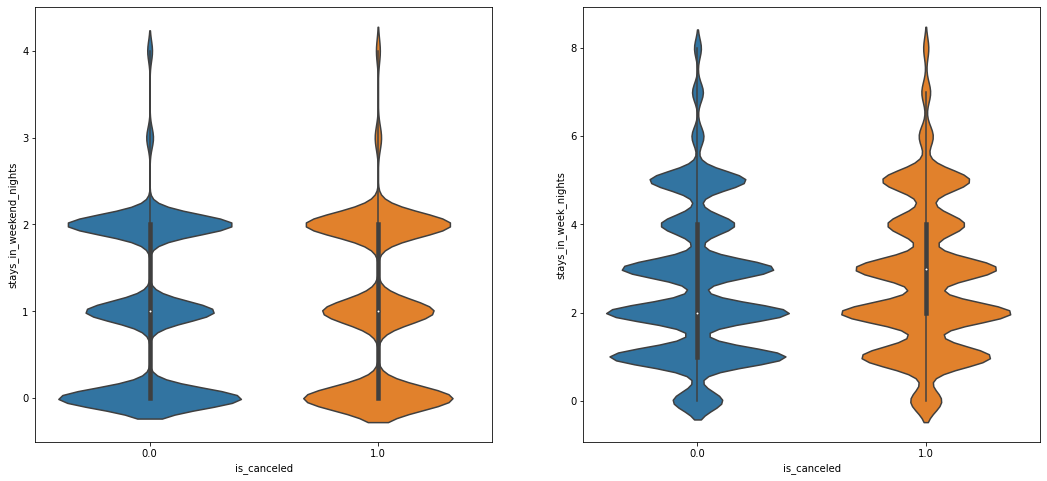

In [ ]:
#Stays in weekend Nights and Week Nights for Cancelled and non cancelled bookings

fig, ax = plt.subplots(1, 2, figsize=[18, 8])

sns.violinplot( x=df_clean["is_canceled"], y=df_clean["stays_in_weekend_nights"], ax = ax[0] )
sns.violinplot( x=df_clean["is_canceled"], y=df_clean["stays_in_week_nights"], ax = ax[1] )

In [ ]:
#sns.pairplot(df_clean,kind="scatter", diag_kind="kde", hue="is_canceled")

In [ ]:
# Computing the correlation matrix 
#
# This is the association between numerical variables in the dataset
#

## Observations from the Bivariate Analysis
1. We see that it is more likely for customers from the city hotel to cancel their booking than the ones from the resort hotel

2. For customer type, the transient customers were most likely to cancel while groups cancelled least

3. We also saw that the guests who put no deposit were very likely to cancel because they had nothing to lose while the ones who put a refundable deposit didn't cancel at all 

4. The bivariate analysis also shows that it was by far less likely for repeated guests to cancel compared to their new counterparts


In [ ]:
df_clean2= df_clean.copy()

In [ ]:
# Label encoding to change our categorical variables to numerical to be able to create our correlation matrix

from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
df_clean['hotel'] = en.fit_transform(df_clean['hotel'])
df_clean['arrival_date_month'] = en.fit_transform(df_clean['arrival_date_month'])
df_clean['country'] = en.fit_transform(df_clean['country'])
df_clean['meal'] = en.fit_transform(df_clean['meal'])
df_clean['reserved_room_type'] = en.fit_transform(df_clean['reserved_room_type'])
df_clean['assigned_room_type'] = en.fit_transform(df_clean['assigned_room_type'])
df_clean['deposit_type'] = en.fit_transform(df_clean['deposit_type'])
df_clean['customer_type'] = en.fit_transform(df_clean['customer_type'])
df_clean['reservation_status'] = en.fit_transform(df_clean['reservation_status'])
df_clean

,hotel,is_canceled,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status
0,1,0.0,5,1.0,0.0,0,2.0,0.0,0,0,121,0,0.0,0.0,2,2,0,2,0.0,0.0,1
4,1,0.0,5,1.0,0.0,2,2.0,0.0,0,0,51,0,0.0,0.0,0,0,0,2,0.0,1.0,1
6,1,0.0,5,1.0,0.0,2,2.0,0.0,0,0,121,0,0.0,0.0,2,2,0,2,0.0,0.0,1
7,1,0.0,5,1.0,0.0,2,2.0,0.0,0,1,121,0,0.0,0.0,2,2,0,2,0.0,1.0,1
8,1,1.0,5,1.0,0.0,3,2.0,0.0,0,0,121,0,0.0,0.0,0,0,0,2,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119383,0,0.0,1,31.0,2.0,4,2.0,0.0,0,0,38,0,0.0,0.0,0,0,0,2,0.0,0.0,1
119384,0,0.0,1,30.0,2.0,5,2.0,0.0,0,0,13,0,0.0,0.0,0,0,0,2,0.0,2.0,1
119385,0,0.0,1,30.0,2.0,5,2.0,0.0,0,0,13,0,0.0,0.0,0,0,0,2,0.0,0.0,1
119388,0,0.0,1,31.0,2.0,5,2.0,0.0,0,0,51,0,0.0,0.0,0,0,0,2,0.0,0.0,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting data into Input and Target Variable

y = df_clean[['is_canceled']]  # target variable 
X = df_clean.drop(['is_canceled'], axis=1)  # input variables

In [ ]:
# Assign variables to capture train test split output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [ ]:
# Standardising the X_train and the X_test to the same scale
#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#creating model. creat regressor object and train it using train data
#
# Building the Logistic Regression model
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state = 1)      
lr_baseline_model = clf_lr.fit(X_train,y_train)

In [ ]:
# Noting down accuracy of the baseline model
from sklearn.metrics import accuracy_score, f1_score

# finding our predicted values
y_pred = lr_baseline_model.predict(X_test)

# Calculating the accuracy and F1 Score by comparing the actual and predicted values
ac = accuracy_score(y_test, y_pred)
f_score = f1_score(y_test ,y_pred)

print("Baseline Model Accuracy:", ac)
print("Baseline Model F1 Score:", f_score)

Baseline Model Accuracy: 0.9889684976686001
Baseline Model F1 Score: 0.9819131083348871


In [ ]:
from sklearn.feature_selection import RFE #importing RFE class from sklearn library

rfe = RFE(estimator= clf_lr , step = 1) 
# estimator clf_lr is the baseline model (basic model) that we have created under "Base line Model" selection
# step = 1: removes one feature at a time and then builds a model on the remaining features
# It uses the model accuracy to identify which features (and combination of features) contribute the most to predicting the target variable.
# we can even provide no. of features as an argument 

# Fit the function for ranking the features
fit = rfe.fit(X_train, y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 10
Selected Features: [ True  True False False  True False False False  True  True False False
 False  True  True  True False False  True  True]
Feature Ranking: [ 1  1  3  4  1 10  9  7  1  1  8  6  5  1  1  1  2 11  1  1]


In [ ]:
X.info()#0,1,4,8,9,13,14,15,18,19

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43962 entries, 0 to 119389
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           43962 non-null  int64  
 1   arrival_date_month              43962 non-null  int64  
 2   arrival_date_day_of_month       43962 non-null  float64
 3   stays_in_weekend_nights         43962 non-null  float64
 4   stays_in_week_nights            43962 non-null  int64  
 5   adults                          43962 non-null  float64
 6   children                        43962 non-null  float64
 7   babies                          43962 non-null  int64  
 8   meal                            43962 non-null  int64  
 9   country                         43962 non-null  int64  
 10  is_repeated_guest               43962 non-null  int64  
 11  previous_cancellations          43962 non-null  float64
 12  previous_bookings_not_canceled 

In [ ]:
selected_rfe_features = pd.DataFrame({'Feature':list(X.iloc[:, 0:]),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')


,Feature,Ranking
0,hotel,1
15,deposit_type,1
14,assigned_room_type,1
13,reserved_room_type,1
18,total_of_special_requests,1
8,meal,1
9,country,1
4,stays_in_week_nights,1
1,arrival_date_month,1
19,reservation_status,1


In [ ]:
df2 = df_clean[['hotel', 'deposit_type','assigned_room_type','reserved_room_type','total_of_special_requests','meal','country','stays_in_week_nights','arrival_date_month','reservation_status']]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43962 entries, 0 to 119389
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   hotel                      43962 non-null  int64  
 1   deposit_type               43962 non-null  int64  
 2   assigned_room_type         43962 non-null  int64  
 3   reserved_room_type         43962 non-null  int64  
 4   total_of_special_requests  43962 non-null  float64
 5   meal                       43962 non-null  int64  
 6   country                    43962 non-null  int64  
 7   stays_in_week_nights       43962 non-null  int64  
 8   arrival_date_month         43962 non-null  int64  
 9   reservation_status         43962 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 4.9 MB


In [ ]:
#dataset colunms  preview
#
df2.columns

Index(['hotel', 'deposit_type', 'assigned_room_type', 'reserved_room_type',
       'total_of_special_requests', 'meal', 'country', 'stays_in_week_nights',
       'arrival_date_month', 'reservation_status'],
      dtype='object')

In [ ]:
df_clean2=df_clean2[['hotel', 'deposit_type', 'assigned_room_type', 'reserved_room_type',
       'total_of_special_requests', 'meal', 'country', 'stays_in_week_nights',
       'arrival_date_month', 'reservation_status']]
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43962 entries, 0 to 119389
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   hotel                      43962 non-null  category
 1   deposit_type               43962 non-null  category
 2   assigned_room_type         43962 non-null  category
 3   reserved_room_type         43962 non-null  category
 4   total_of_special_requests  43962 non-null  float64 
 5   meal                       43962 non-null  category
 6   country                    43962 non-null  category
 7   stays_in_week_nights       43962 non-null  int64   
 8   arrival_date_month         43962 non-null  category
 9   reservation_status         43962 non-null  category
dtypes: category(8), float64(1), int64(1)
memory usage: 2.6 MB


so we are going the following algorithms:


1. Logistic Reg
2. Random Forest
2. Gradient Boosted Trees
4. Naive Bayes Classifier
5. Neural Networks
6. k-NN classifier
7. SVM




**Logistic regression**

using 10 features of the dataset

In [ ]:
# Splitting data into Input and Target Variable

y = df_clean[['is_canceled']]  # target variable 
X = df_clean.drop(['is_canceled'], axis=1)  # input variables

In [ ]:
# Spliting the data into training at 70% of data and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 101)

In [ ]:
# Standardising the X_train and the X_test to the same scale
#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**hyperperameter tuning**

In [ ]:
#importing nessary libruaries
#
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV

In [ ]:
# Creating regularization penalty space
penalty = ['l1', 'l2']

In [ ]:
# Creating regularization hyperparameter space
C = np.logspace(0, 4, 10)

In [ ]:
# Creating hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [ ]:
# Fitting grid search
#best_model = clf.fit(X, y)

In [ ]:
# Fitting grid search
#best_model = clf.fit(X, y)

In [ ]:
# Viewing best hyperparameters
#print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
#print('Best C:', best_model.best_estimator_.get_params()['C'])

In [ ]:
#creating model. creat regressor object and train it using train data
#
# Building the Logistic Regression model
#from sklearn.linear_model import LogisticRegression
#from sklearn import metrics

#logreg = LogisticRegression(random_state = 1, C=1., penalty='l2')      
#logreg.fit(X_train,y_train)

In [ ]:
#model prediction
#
#y_pred = logreg.predict(X_test)


In [ ]:
#from sklearn.model_selection import cross_val_score
#print(logreg.score(y_test, y_test))

RNN model

In [ ]:
#creating dummies for the categorical columns
columns = df_clean2.columns
df_clean2 = pd.get_dummies(df_clean2, columns=columns, drop_first=True)
df_clean2.head()

,hotel_Resort Hotel_1,deposit_type_Non Refund_1,deposit_type_Refundable_1,assigned_room_type_B_1,assigned_room_type_C_1,assigned_room_type_D_1,assigned_room_type_E_1,assigned_room_type_F_1,assigned_room_type_G_1,assigned_room_type_H_1,assigned_room_type_I_1,assigned_room_type_K_1,reserved_room_type_B_1,reserved_room_type_C_1,reserved_room_type_D_1,reserved_room_type_E_1,reserved_room_type_F_1,reserved_room_type_G_1,reserved_room_type_H_1,reserved_room_type_L_1,total_of_special_requests_1.0_1,total_of_special_requests_2.0_1,meal_FB_1,meal_HB_1,meal_SC_1,meal_Undefined_1,country_AGO_1,country_ALB_1,country_AND_1,country_ARE_1,country_ARG_1,country_ARM_1,country_ASM_1,country_ATF_1,country_AUS_1,country_AUT_1,country_AZE_1,country_BDI_1,country_BEL_1,country_BEN_1,...,country_THA_1,country_TJK_1,country_TMP_1,country_TUN_1,country_TUR_1,country_TWN_1,country_TZA_1,country_UGA_1,country_UKR_1,country_UMI_1,country_URY_1,country_USA_1,country_UZB_1,country_VEN_1,country_VGB_1,country_VNM_1,country_ZAF_1,country_ZMB_1,country_ZWE_1,stays_in_week_nights_1_1,stays_in_week_nights_2_1,stays_in_week_nights_3_1,stays_in_week_nights_4_1,stays_in_week_nights_5_1,stays_in_week_nights_6_1,stays_in_week_nights_7_1,stays_in_week_nights_8_1,arrival_date_month_August_1,arrival_date_month_December_1,arrival_date_month_February_1,arrival_date_month_January_1,arrival_date_month_July_1,arrival_date_month_June_1,arrival_date_month_March_1,arrival_date_month_May_1,arrival_date_month_November_1,arrival_date_month_October_1,arrival_date_month_September_1,reservation_status_Check-Out_1,reservation_status_No-Show_1
0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
6,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
7,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
#Defining our dependent and Independent Variables

Y = df_clean[['is_canceled']] # target variable
X = df_clean2 # feature variables


In [ ]:
#data normalization
from sklearn import preprocessing
#
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

Normalizing our data is very important, as we want the input features to be on the same order of magnitude to make our training easier. We'll use a min-max scaler from scikit-learn which scales our data to be between 0 and 1

In [ ]:
#checking the scaled values
#
X_scale

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

we set aside some parts of our dataset for a validation set and a test set. We use the function train_test_split from scikit-learn to do that.

In [ ]:
#importing the library to be used in splitting dataset
#
from sklearn.model_selection import train_test_split

In [ ]:
#splitting dataset into train set ata 70%
#
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [ ]:
#set aside some parts of our dataset for a validation set and a test set.
#
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(30773, 209) (6594, 209) (6595, 209) (30773, 1) (6594, 1) (6595, 1)


### building and training our neural network

We will be using Keras to build our architecture.

In [ ]:
#installing tensorflow
#
!pip install tensorflow

In [ ]:
#import the code from Keras that we will need to use
#
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

We will be using the Sequential model, which means that we merely need to describe the layers above in sequence. we will use  neural network of three layers:

- Hidden layer 1: 100 neurons, ReLU activation
- Hidden layer 2: 100 neurons, ReLU activation
- Hidden layer 3: 100 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation

In [ ]:
#we use squential model with allows to build a model layer by layer.
#
model = tf.keras.Sequential([
    layers.Dense(100, activation='relu', input_shape=(209,)),
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

Before we start our training, we have to configure the model by
- the algorithm to use to do the optimization (we'll use stochastic gradient descent)
- The loss function to use (for binary classification, we will use binary cross entropy)
- The other metrics to track apart from the loss function (we want to track accuracy as well)

In [ ]:
#configuring the model; this helps to find the best numbers for it
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Training the model.

* Fitting the parameters to the data. 
- Our X_train and Y_train
- the size of our mini-batch 
- how long we want to train it for (epochs)
- what our validation data is so that the model will tell us how we are doing on the validation data at each point.

 output will give  a history, which we save under the variable hist. We'll use this variable a little later.

In [ ]:
#fitting the model and saving the variable in hist.
#
hist = model.fit(X_train, Y_train,
          batch_size=40, epochs=10,
          validation_data=(X_val, Y_val))

Epoch 1/10
770/770 [==============================] - 1s 2ms/step - loss: 0.3635 - accuracy: 0.8180 - val_loss: 0.0712 - val_accuracy: 1.0000
Epoch 2/10
770/770 [==============================] - 1s 2ms/step - loss: 0.0253 - accuracy: 1.0000 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 3/10
770/770 [==============================] - 1s 2ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 4/10
770/770 [==============================] - 1s 2ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 5/10
770/770 [==============================] - 1s 2ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 6/10
770/770 [==============================] - 1s 2ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 7/10
770/770 [==============================] - 1s 2ms/step - loss: 9.4717e-04 - accuracy: 1.0000 - val_loss: 8.3891e-04 - val_accuracy: 1.000

Evaluating our data on the test set

In [ ]:
#evaluatin the dataset
#
model.evaluate(X_test, Y_test)[1]

207/207 [==============================] - 0s 1ms/step - loss: 5.1205e-04 - accuracy: 1.0000


1.0

In [ ]:
#import visualization library
import matplotlib.pyplot as plt

In [ ]:
#visualize the training loss and the validation loss
#
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

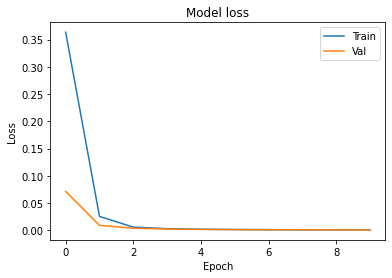

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

**observation**: loss reduces upto a certain point in both data.

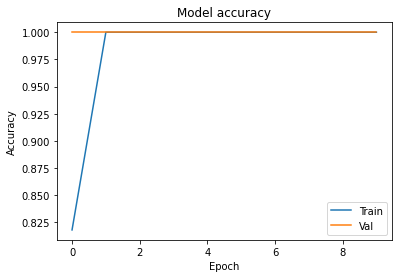

In [ ]:
#visualize the training accuracy and the validation accuracy
#
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

**observation:** accuracy increases sharply. this is due to overfitting.

**hyperparameters tuning**

In [ ]:
#importing the relevant libraries
#
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
import numpy

In [ ]:
# getting the best batch size and epoch for the model
#
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=209, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
 fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 1.000000 using {'batch_size': 10, 'epochs': 100}
0.999932 (0.000097) with: {'batch_size': 10, 'epochs': 10}
0.999886 (0.000161) with: {'batch_size': 10, 'epochs': 50}
1.000000 (0.000000) with: {'batch_size': 10, 'epochs': 100}
0.997589 (0.003410) with: {'batch_size': 20, 'epochs': 10}
1.000000 (0.000000) with: {'batch_size': 20, 'epochs': 50}
0.999795 (0.000290) with: {'batch_size': 20, 'epochs': 100}
0.985442 (0.020588) with: {'batch_size': 40, 'epochs': 10}
0.999682 (0.000450) with: {'batch_size': 40, 'epochs': 50}
0.999704 (0.000418) with: {'batch_size': 40, 'epochs': 100}
0.938015 (0.087661) with: {'batch_size': 60, 'epochs': 10}
0.985328 (0.020749) with: {'batch_size': 60, 'epochs': 50}
0.999955 (0.000064) with: {'batch_size': 60, 'epochs': 100}
0.936741 (0.089462) with: {'batch_size': 80, 'epochs': 10}
0.998271 (0.002445) with: {'batch_size': 80, 'epochs': 50}
0.997020 (0.004214) with: {'batch_size': 80, 'epochs': 100}
0.936377 (0.089736) with: {'batch_size': 100, 'epochs':

**building model 2 with the optimal parameters**

In [ ]:
#adding regularization to our model
#
model_2 = tf.keras.Sequential([
    layers.Dense(20, activation='relu', kernel_regularizer=keras.regularizers.l2(0.1), input_shape=(209,)),
    layers.Dense(20, activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)),
    layers.Dense(20, activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)),
    layers.Dense(1, activation='sigmoid', kernel_regularizer=keras.regularizers.l2(0.1)),
])

In [ ]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=20, epochs=50,
          validation_data=(X_val, Y_val))

Epoch 1/50
1539/1539 [==============================] - 2s 1ms/step - loss: 1.0695 - accuracy: 0.6946 - val_loss: 0.6163 - val_accuracy: 0.6968
Epoch 2/50
1539/1539 [==============================] - 2s 1ms/step - loss: 0.6168 - accuracy: 0.6946 - val_loss: 0.6141 - val_accuracy: 0.6968
Epoch 3/50
1539/1539 [==============================] - 2s 1ms/step - loss: 0.6156 - accuracy: 0.6946 - val_loss: 0.6137 - val_accuracy: 0.6968
Epoch 4/50
1539/1539 [==============================] - 2s 1ms/step - loss: 0.6156 - accuracy: 0.6946 - val_loss: 0.6136 - val_accuracy: 0.6968
Epoch 5/50
1539/1539 [==============================] - 2s 1ms/step - loss: 0.6155 - accuracy: 0.6946 - val_loss: 0.6137 - val_accuracy: 0.6968
Epoch 6/50
1539/1539 [==============================] - 2s 1ms/step - loss: 0.6155 - accuracy: 0.6946 - val_loss: 0.6135 - val_accuracy: 0.6968
Epoch 7/50
1539/1539 [==============================] - 2s 1ms/step - loss: 0.6155 - accuracy: 0.6946 - val_loss: 0.6136 - val_accuracy:

visualization of model 2 to see what it looks like in terms of the loss and accuracy

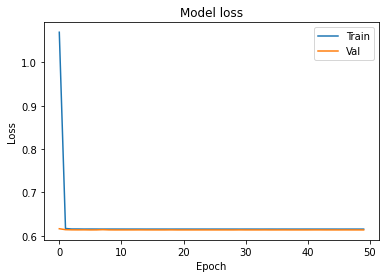

In [ ]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

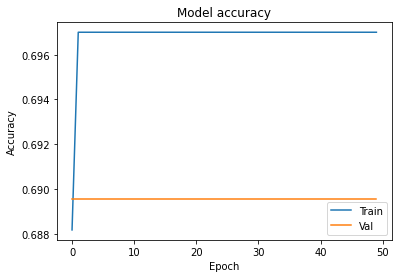

In [ ]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

**observation**: model 2 is less overfitting and better than the first model.it gives us 69.4% accuracy.

## Follow up questions

In [ ]:
1. Did we have the right data?

* Yes

In [ ]:
2. Do we need other data to answer our question?

* No

3. we need more data to do away with overfitting.

* yes.

In [ ]:
4. Did we have the right question?

* yes.